# Section 1

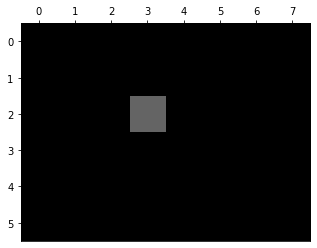

In [3]:
#A gray scale image
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im = np.zeros((6,8),dtype=np.uint8)
im[2,3] = 100
fig,ax=plt.subplots()
ax.imshow(im,cmap='gray',vmin=0,vmax=255)
ax.xaxis.tick_top()
plt.show()

[100 100 200]


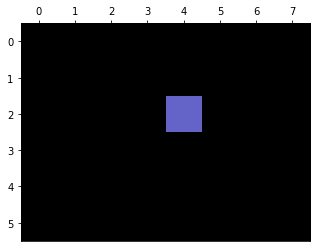

In [8]:
#A color image
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im = np.zeros((6,8,3),dtype=np.uint8)
im[2,4] =[100,100,200]   #[R,G,B]
print(im[2,4])
fig,ax = plt.subplots()
ax.imshow(im)
ax.xaxis.tick_top()
plt.show()

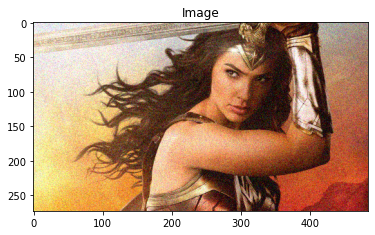

In [11]:
# Display image using Matplotlib
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread("P1.png",cv.IMREAD_COLOR)#imread function read the image in the order of colors BGR
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)#here BGR image is converted into RGB
fig , ax = plt.subplots()
ax.imshow(img)
ax.set_title('Image')
plt.show()

In [15]:
#Display using OpenCv
import cv2 as cv
img = cv.imread("P1.png",cv.IMREAD_COLOR)
cv.namedWindow("image",cv.WINDOW_NORMAL)
cv.imshow("Image",img)
cv.waitKey(0)
cv.destroyAllWindows()

#Note: namedWindow() method is used to create a window with a 
# suitable name and size to display images and videos on the screen

In [16]:
#Display image properties
print(img.shape)# It returns a tuple of the number of rows, columns, and channels (if the image is color)
#If an image is grayscale, the tuple returned contains only the number of rows and columns
print(img.size)#Total Number of Pixels
print(img.dtype)#image Data type

### Note: img.dtype is very important while debugging because a large number of 
#errors in OpenCV-Python code are caused by invalid datatype

(273, 485, 3)
397215
uint8


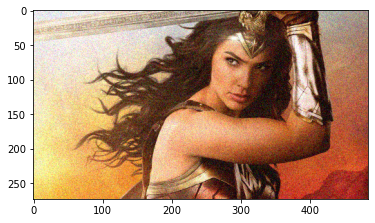

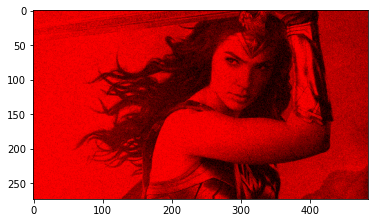

In [38]:
#Zeroing Out Green amd Blue Planes
%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
img = cv.imread("P1.png",cv.IMREAD_ANYCOLOR)
if img is None:
    print('Image could not be read')
    assert False
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
img[:,:,1:3] = 0
plt.imshow(img)
plt.show()

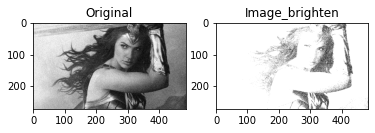

In [3]:
#Increase the brightness using loops
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
def image_brighten(image,shift):
    h = image.shape[0]
    w = image.shape[1]
    result = np.zeros(image.shape,image.dtype)
    for i in range(0,h): #For loop to access each pixels
        for j in range(0,w):
            no_overflow = True if image[i,j] + shift<255 else False
            result[i,j] = min(image[i,j]+shift,255) if no_overflow else 255
    return result
img = cv.imread("P1.png",cv.IMREAD_GRAYSCALE)
imgb = image_brighten(img, 200)
f, ax =plt.subplots(1,2)
ax[0].imshow(img,cmap = 'gray')
ax[0].set_title('Original')
ax[1].imshow(imgb,cmap = 'gray')
ax[1].set_title('Image_brighten')
plt.show()
#Inefficient method, Use OpenCV filters or Cython

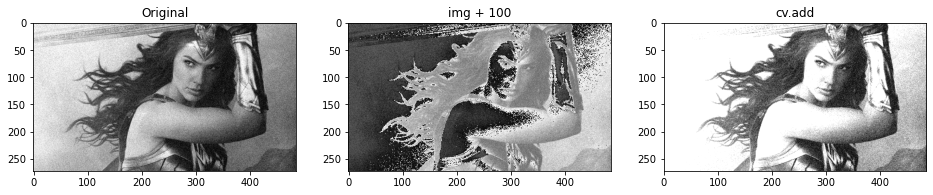

In [8]:
#increasing brightness using OpenCV
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread("P1.png",cv.IMREAD_GRAYSCALE)
imgb = img +100 #incorrect operation
imgc = cv.add(img,100)
f,ax = plt.subplots(1,3,figsize = (16,8))
ax[0].imshow(img,cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(imgb,cmap='gray')
ax[1].set_title('img + 100')
ax[2].imshow(imgc,cmap='gray')
ax[2].set_title('cv.add')
plt.show()

# Section 2
Intensity Transformations

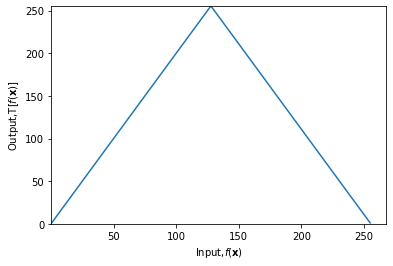

In [31]:
#Identity transformation,Intensity Windowing
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
trans1 = np.arange(0,256,2).astype('uint8')#np.arange(start,stop,step) stop number is not included
trans2 = np.arange(255,-1,-2).astype('uint8')
trans = np.concatenate((trans1,trans2),axis=0).astype('uint8')
fig, ax = plt.subplots()
ax.plot(trans)
ax.set_xlabel(r'Input,$f(\mathbf{x})$')
ax.set_ylabel('Output,$\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0.255)
ax.set_ylim(0,255)
plt.show()

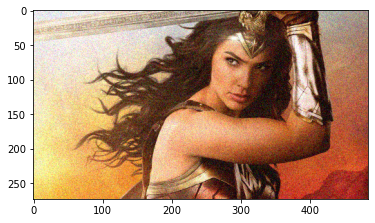

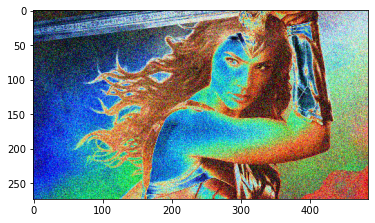

In [30]:
img = cv.imread("P1.png",cv.IMREAD_COLOR)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
imgtrans = cv.LUT(img,trans)
plt.imshow(imgtrans)
plt.show()
# image transform using numpy

#imgtrans1 = np.transform(img)
#plt.imshow(imgtrans1)
#plt.show()

# Section 3
histograms

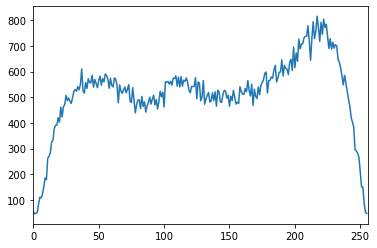

In [34]:
#Histogram of a grayscale image
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('P1.png',cv.IMREAD_GRAYSCALE)
hist = cv.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.xlim([0,256])
plt.show()

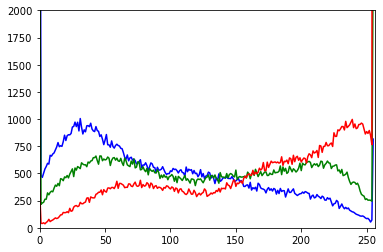

In [37]:
#Histogram of a color image
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('P1.png',cv.IMREAD_COLOR)
color = ('b','g','r')
for i,c in enumerate(color):
    hist = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist,color=c)
    plt.xlim([0,256])
    plt.ylim([0,2000])
plt.show()

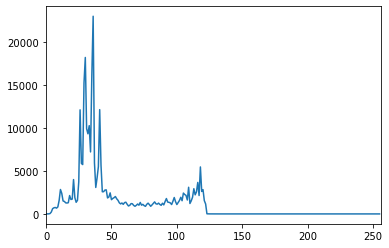

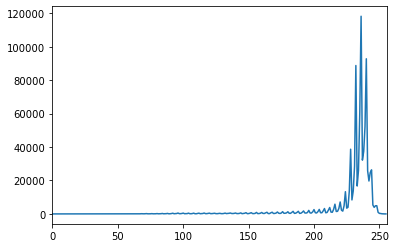

In [46]:
#Histogram of a dark image, many values in the left region corresponds to dark pixels 
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('dark.jpg',cv.IMREAD_GRAYSCALE)
hist = cv.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.xlim([0,256])
plt.show()
#Histogram of a bright image, many values in the right region corresponds to bright pixels
img1 = cv.imread('bright1.tif',cv.IMREAD_GRAYSCALE)
hist1 = cv.calcHist([img1],[0],None,[256],[0,256])
plt.plot(hist1)
plt.xlim([0,256])
plt.show()

# Note : A flat histogram signifies that the image has a uniform distribution of all intensities.
# Then, the contrast is high and image will look vibrant

# Section 4
Histogram Equalization